In [10]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage import data
from skimage import filters
from skimage import exposure

In [11]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

In [12]:
# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

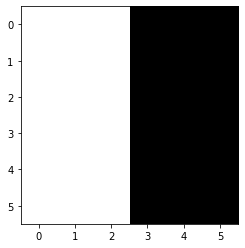

In [13]:
# image
image = np.array([[20,20,20,10,10,10], [20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10]],dtype=np.float32)
plt.imshow(image, cmap= 'gray')

In [14]:
#defining the kernel
kernel = np.array([[1,0,-1], [1,0,-1],[1,0,-1]],dtype=np.float32) 
kernel

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]], dtype=float32)

[[ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]]


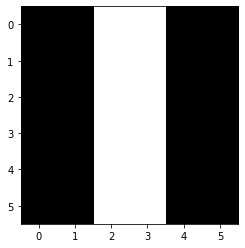

In [15]:
# The output we get after convolving image with filter
output = cv2.filter2D(image,-1,kernel)
print(output)
plt.imshow(output, cmap = 'gray')

In [16]:
import matplotlib as mpl
def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:      
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape
        
    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    # Display the image.
    plt.imshow(image, cmap)

In [17]:
image1= cv2.imread('/content/puppy.jpg')
image2= cv2.imread('/content/puppy.jpg')
image3= cv2.imread('/content/widow.jpg')
#image4=cv2.imread('/content/image4.png')


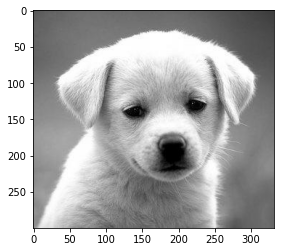

In [18]:
plt.imshow(image1, cmap='gray')


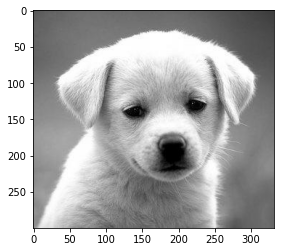

In [19]:
plt.imshow(image2)

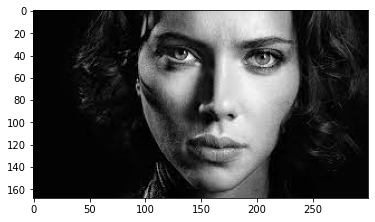

In [20]:
plt.imshow(image3)

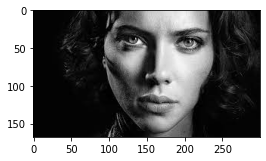

In [21]:
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
plotting(gray, cmap = 'gray')

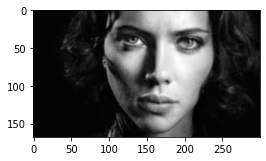

In [22]:
# Add some Gaussian Blur
gaussian = cv2.GaussianBlur(gray,(3,3),0)
#plotting
plotting(gaussian, cmap = 'gray')


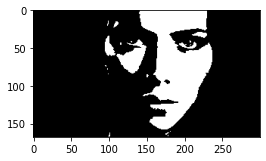

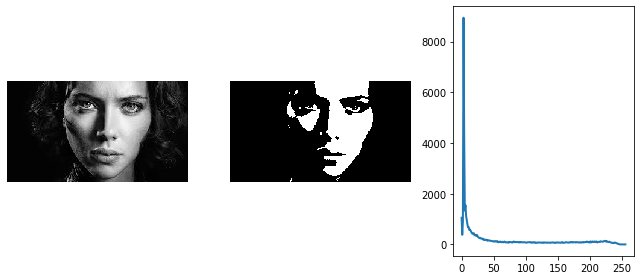

In [24]:
ret, simple_threshold = cv2.threshold(gaussian,127,255,cv2.THRESH_BINARY)
plotting(simple_threshold, cmap = 'gray')
# camera = data.camera()
val = simple_threshold

hist, bins_center = exposure.histogram(gray)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(gray, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(gray < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)

#plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

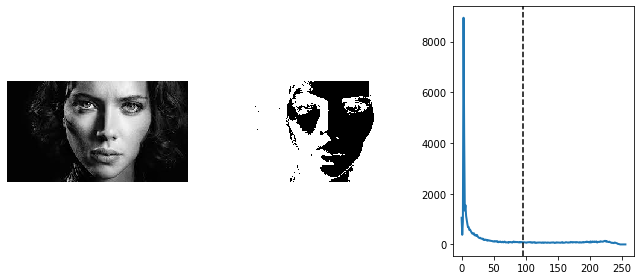

In [26]:

val = filters.threshold_otsu(gray)

hist, bins_center = exposure.histogram(gray)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(gray, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(gray < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()